In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from os import listdir
sns.set(style="ticks", font_scale=1.2)
plt.rc("axes.spines", top=False, right=False)

from utils import *

OUTPUT measures (4): ['output_entropy', 'output_rank_correct', 'output_logprob_correct', 'output_logprobdiff']
PROCESS measures (15): ['auc_entropy', 'layer_biggest_change_entropy', 'auc_rank_correct', 'layer_biggest_change_rank_correct', 'auc_logprob_correct', 'layer_biggest_change_logprob_correct', 'auc_logprobdiff_pos', 'auc_logprobdiff_neg', 'layer_biggest_change_logprobdiff', 'auc_boosting_pos', 'auc_boosting_neg', 'layer_argmax_boosting', 'twostage_magnitude', 'twostage_magnitude_latter34', 'twostage_layer']


# Distribution of human responses for capitals recall

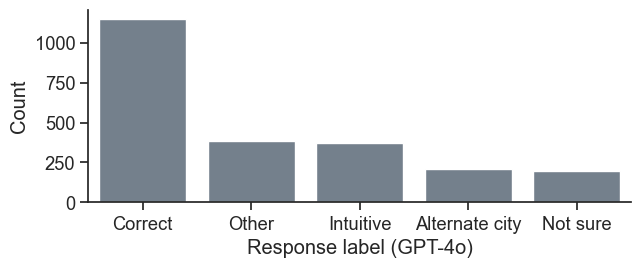

In [2]:
def plot_capitals_response_distribution():
    df = pd.read_csv(f"../../data/human/capitals-recall_trial_labeled.csv")
    counts = df["gpt-4o_label"].value_counts().to_frame().reset_index().rename(
        columns={"gpt-4o_label": "count", "index": "label"}
    )
    ax = sns.barplot(
        data=counts,
        x="label",
        y="count",
        color="slategrey"
    )
    ax.set_xlabel("Response label (GPT-4o)")
    ax.set_ylabel("Count")
    plt.gcf().set_size_inches(7,2.5)
    
plot_capitals_response_distribution()
plt.savefig(f"../../figures/human/capitals-recall_labels.pdf", dpi=300, bbox_inches="tight")

# Task accuracy

In [3]:
def compute_text_task_accuracy():
    outputs = []
    for task in TASKS:
        for model in MODELS:
            try:
                model_df = pd.read_csv(
                    f"../../data/model_output/logit_lens/{task}_{model}.csv"
                )
            except:
                print(f"No data found for {task}, {model}")
                continue
            final_df = model_df[model_df.layer_idx==N_LAYERS[model]-1]
            final_df["model"] = model
            final_df["model_size"] = final_df["model"].apply(get_model_size)
            accuracy = final_df["sum_logprob_response_isCorrect"].mean()
            print(task, model, accuracy)
            final_df = final_df.rename(columns={
                "sum_logprob_response_isCorrect": "response_correct"
            })
            outputs.append(final_df)

        # Read human data.
        try:
            human_df = pd.read_csv(
                f"../../data/human/{task}_trial.csv" 
                if task != "capitals-recall" else f"../../data/human/{task}_trial_labeled.csv"
            )
        except FileNotFoundError:
            print(f"No human data for {task}")
            continue
            
        if task == "capitals-recall":
            human_df["response_correct"] = (human_df["gpt-4o_label"] == "Correct")
        elif task == "animals":
            human_df = human_df.rename(columns={"correct": "response_correct"})
        assert "response_correct" in human_df.columns
        human_df["task"] = task
        human_df["model"] = "Human"
        outputs.append(human_df)

        print("="*80)

    outputs = pd.concat(outputs).reset_index()
    return outputs

text_acc = compute_text_task_accuracy()

/var/folders/72/ykl8sn4d11nfbqbbzl2v6znc0000gq/T/ipykernel_10978/1319226992.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df["model"] = model
/var/folders/72/ykl8sn4d11nfbqbbzl2v6znc0000gq/T/ipykernel_10978/1319226992.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df["model_size"] = final_df["model"].apply(get_model_size)
/var/folders/72/ykl8sn4d11nfbqbbzl2v6znc0000gq/T/ipykernel_10978/1319226992.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

capitals-recall gpt2 0.4838709677419355
capitals-recall gpt2-medium 0.45161290322580644
capitals-recall gpt2-xl 0.6129032258064516
capitals-recall Llama-2-7b-hf 0.9354838709677419
capitals-recall Llama-2-13b-hf 0.9838709677419355
capitals-recall Llama-2-70b-hf 1.0
capitals-recall Llama-3.1-8B 0.9516129032258065
capitals-recall Llama-3.1-70B 1.0
capitals-recall Llama-3.1-405B 1.0
capitals-recall gemma-2-2b 0.7580645161290323
capitals-recall gemma-2-9b 0.9354838709677419
capitals-recall gemma-2-27b 0.9838709677419355
capitals-recall OLMo-2-1124-7B 1.0
capitals-recall OLMo-2-1124-13B 0.9838709677419355
capitals-recall OLMo-2-0325-32B 1.0
capitals-recall Falcon3-1B-Base 0.9032258064516129
capitals-recall Falcon3-3B-Base 0.9516129032258065
capitals-recall Falcon3-10B-Base 1.0
capitals-recognition gpt2 0.46774193548387094
capitals-recognition gpt2-medium 0.5161290322580645
capitals-recognition gpt2-xl 0.6935483870967742
capitals-recognition Llama-2-7b-hf 1.0
capitals-recognition Llama-2-13b-

/var/folders/72/ykl8sn4d11nfbqbbzl2v6znc0000gq/T/ipykernel_10978/1319226992.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df["model"] = model
/var/folders/72/ykl8sn4d11nfbqbbzl2v6znc0000gq/T/ipykernel_10978/1319226992.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df["model_size"] = final_df["model"].apply(get_model_size)
/var/folders/72/ykl8sn4d11nfbqbbzl2v6znc0000gq/T/ipykernel_10978/1319226992.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

capitals-recognition Llama-3.1-405B 1.0
capitals-recognition gemma-2-2b 0.9193548387096774
capitals-recognition gemma-2-9b 0.9761904761904762
capitals-recognition gemma-2-27b 1.0
capitals-recognition OLMo-2-1124-7B 1.0
capitals-recognition OLMo-2-1124-13B 1.0
capitals-recognition OLMo-2-0325-32B 1.0
capitals-recognition Falcon3-1B-Base 0.8145161290322581
capitals-recognition Falcon3-3B-Base 0.9354838709677419
capitals-recognition Falcon3-10B-Base 1.0
animals gpt2 0.7894736842105263
animals gpt2-medium 0.8421052631578947
animals gpt2-xl 0.8947368421052632
animals Llama-2-7b-hf 1.0


/var/folders/72/ykl8sn4d11nfbqbbzl2v6znc0000gq/T/ipykernel_10978/1319226992.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df["model"] = model
/var/folders/72/ykl8sn4d11nfbqbbzl2v6znc0000gq/T/ipykernel_10978/1319226992.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df["model_size"] = final_df["model"].apply(get_model_size)
/var/folders/72/ykl8sn4d11nfbqbbzl2v6znc0000gq/T/ipykernel_10978/1319226992.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

animals Llama-2-13b-hf 0.9473684210526315
animals Llama-2-70b-hf 1.0
animals Llama-3.1-8B 1.0
animals Llama-3.1-70B 1.0
animals Llama-3.1-405B 1.0
animals gemma-2-2b 1.0
animals gemma-2-9b 1.0
animals gemma-2-27b 1.0
animals OLMo-2-1124-7B 1.0
animals OLMo-2-1124-13B 1.0
animals OLMo-2-0325-32B 1.0
animals Falcon3-1B-Base 1.0
animals Falcon3-3B-Base 1.0
animals Falcon3-10B-Base 1.0
gender gpt2 0.8125
gender gpt2-medium 0.9375
gender gpt2-xl 0.9875
gender Llama-2-7b-hf 0.75
gender Llama-2-13b-hf 0.9625
gender Llama-2-70b-hf 0.9625
gender Llama-3.1-8B 0.5875
gender Llama-3.1-70B 0.9625
gender Llama-3.1-405B 0.85
gender gemma-2-2b 0.875


/var/folders/72/ykl8sn4d11nfbqbbzl2v6znc0000gq/T/ipykernel_10978/1319226992.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df["model"] = model
/var/folders/72/ykl8sn4d11nfbqbbzl2v6znc0000gq/T/ipykernel_10978/1319226992.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df["model_size"] = final_df["model"].apply(get_model_size)
/var/folders/72/ykl8sn4d11nfbqbbzl2v6znc0000gq/T/ipykernel_10978/1319226992.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

gender gemma-2-9b 0.85
gender gemma-2-27b 0.55
gender OLMo-2-1124-7B 0.9375
gender OLMo-2-1124-13B 0.8375
gender OLMo-2-0325-32B 0.525
gender Falcon3-1B-Base 0.975
gender Falcon3-3B-Base 0.925
gender Falcon3-10B-Base 0.875
No human data for gender
syllogism gpt2 0.5
syllogism gpt2-medium 0.5


/var/folders/72/ykl8sn4d11nfbqbbzl2v6znc0000gq/T/ipykernel_10978/1319226992.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df["model"] = model
/var/folders/72/ykl8sn4d11nfbqbbzl2v6znc0000gq/T/ipykernel_10978/1319226992.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df["model_size"] = final_df["model"].apply(get_model_size)
/var/folders/72/ykl8sn4d11nfbqbbzl2v6znc0000gq/T/ipykernel_10978/1319226992.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

syllogism gpt2-xl 0.5
syllogism Llama-2-7b-hf 0.5
syllogism Llama-2-13b-hf 0.5520833333333334


/var/folders/72/ykl8sn4d11nfbqbbzl2v6znc0000gq/T/ipykernel_10978/1319226992.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df["model"] = model
/var/folders/72/ykl8sn4d11nfbqbbzl2v6znc0000gq/T/ipykernel_10978/1319226992.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df["model_size"] = final_df["model"].apply(get_model_size)
/var/folders/72/ykl8sn4d11nfbqbbzl2v6znc0000gq/T/ipykernel_10978/1319226992.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

syllogism Llama-2-70b-hf 0.5
syllogism Llama-3.1-8B 0.5677083333333334
syllogism Llama-3.1-70B 0.6197916666666666
No data found for syllogism, Llama-3.1-405B


/var/folders/72/ykl8sn4d11nfbqbbzl2v6znc0000gq/T/ipykernel_10978/1319226992.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df["model"] = model
/var/folders/72/ykl8sn4d11nfbqbbzl2v6znc0000gq/T/ipykernel_10978/1319226992.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df["model_size"] = final_df["model"].apply(get_model_size)
/var/folders/72/ykl8sn4d11nfbqbbzl2v6znc0000gq/T/ipykernel_10978/1319226992.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

syllogism gemma-2-2b 0.5
syllogism gemma-2-9b 0.6770833333333334
syllogism gemma-2-27b 0.5885416666666666
syllogism OLMo-2-1124-7B 0.5416666666666666


/var/folders/72/ykl8sn4d11nfbqbbzl2v6znc0000gq/T/ipykernel_10978/1319226992.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df["model"] = model
/var/folders/72/ykl8sn4d11nfbqbbzl2v6znc0000gq/T/ipykernel_10978/1319226992.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df["model_size"] = final_df["model"].apply(get_model_size)
/var/folders/72/ykl8sn4d11nfbqbbzl2v6znc0000gq/T/ipykernel_10978/1319226992.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

syllogism OLMo-2-1124-13B 0.6354166666666666
syllogism OLMo-2-0325-32B 0.5729166666666666
syllogism Falcon3-1B-Base 0.5
syllogism Falcon3-3B-Base 0.6927083333333334
syllogism Falcon3-10B-Base 0.8333333333333334


/var/folders/72/ykl8sn4d11nfbqbbzl2v6znc0000gq/T/ipykernel_10978/1319226992.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df["model"] = model
/var/folders/72/ykl8sn4d11nfbqbbzl2v6znc0000gq/T/ipykernel_10978/1319226992.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df["model_size"] = final_df["model"].apply(get_model_size)


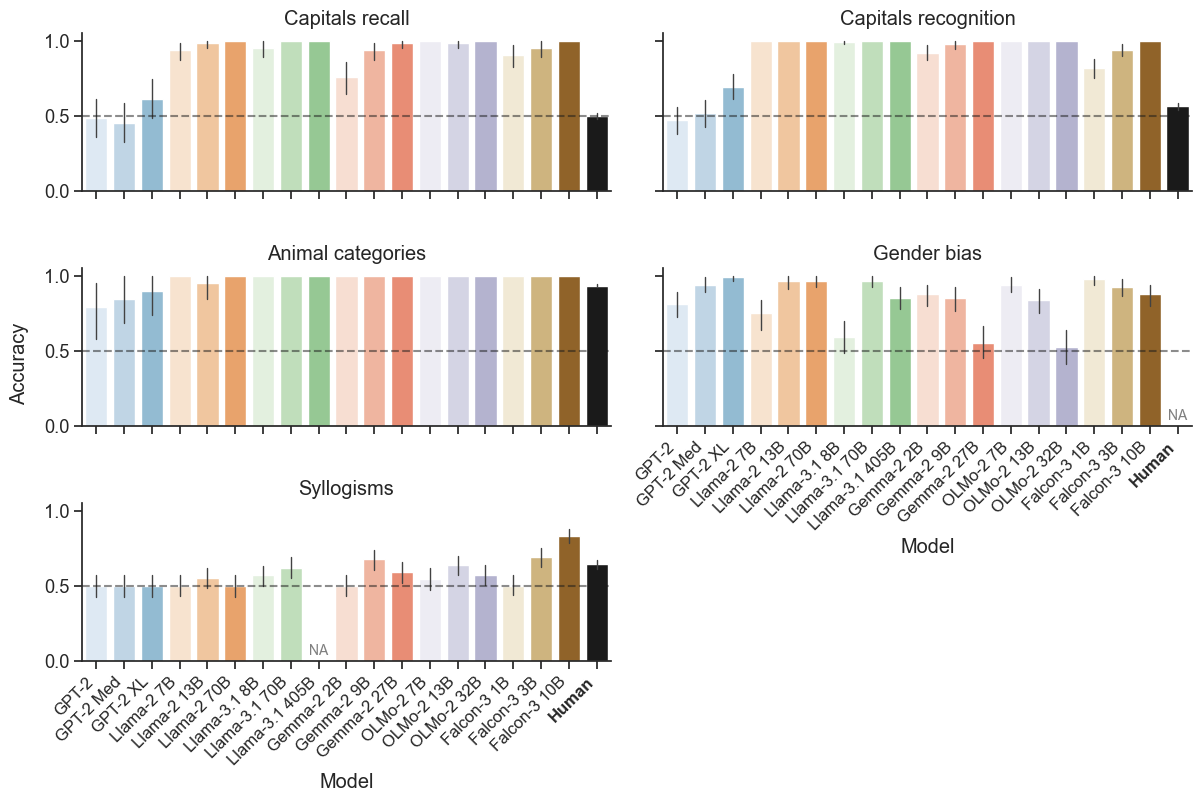

In [4]:
# TEXT-BASED TASKS
def plot_text_task_accuracy(df):
    order = MODELS + ["Human"]
    g = sns.catplot(
        data=df,
        col="task",
        col_order=TASKS,
        col_wrap=2,
        x="model",
        y="response_correct",
        hue="model",
        hue_order=order,
        order=order,
        palette=MODEL_PAL,
        kind="bar",
        height=2.5,
        aspect=2.5,
        legend=False,
        err_kws=dict(lw=1)
    )
    g.set_xticklabels([MODEL_MAP[m] for m in order], rotation=45, ha="right", size="small")
    g.set_axis_labels("Model", "")
    fig = plt.gcf()
    fig.supylabel("Accuracy", x=0.01, size="medium")
    for i, ax in enumerate(g.axes.flat):
        ax.axhline(0.5, linestyle="--", color="k", alpha=0.5)
        for lab in ax.get_xticklabels():
            if lab.get_text() == "Human":
                lab.set_weight("bold")
        ax.set_title(TASK_NAMES[TASKS[i]])
        if TASKS[i] == "syllogism":
            # missing data for Llama-3.1 405B
            ax.text(
                order.index("Llama-3.1-405B"), 
                0.02, 
                "NA", 
                size="x-small", color="gray", va="bottom", ha="center"
            )
        elif TASKS[i] == "gender":
            # missing human data
            ax.text(
                order.index("Human"), 
                0.02, 
                "NA", 
                size="x-small", color="gray", va="bottom", ha="center"
            )
    
    plt.subplots_adjust(wspace=0.1)
    sns.despine()
    plt.savefig("../../figures/accuracy_text.pdf", dpi=300, bbox_inches="tight")

plot_text_task_accuracy(text_acc)

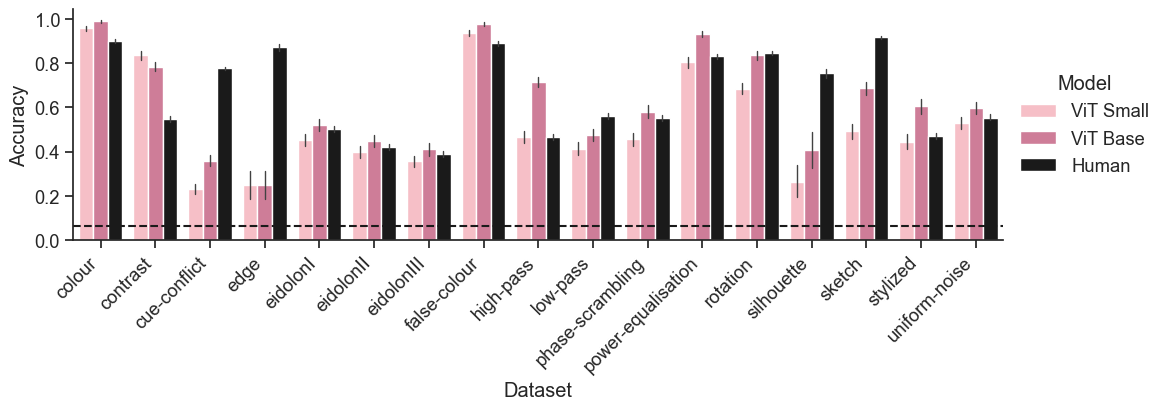

In [5]:
# VISION-BASED TASKS
def plot_vision_task_accuracy():
    outputs = []
    datasets = sorted([
        f for f in listdir("../../src/vision/model-vs-human/raw-data") if f != "metrics"
    ])
    for dataset in datasets:
        # read human data
        dataset_folder = f"../../src/vision/model-vs-human/raw-data/{dataset}"
        human_df = pd.concat([
            pd.read_csv(f"{dataset_folder}/{f}") for f in listdir(dataset_folder)
        ])
        human_df["response_correct"] = (human_df["object_response"] == human_df["category"])
        human_df["dataset_name"] = dataset
        human_df["model"] = "Human"
        outputs.append(human_df)

        # read model data
        for model in VISION_MODELS:
            model_df = pd.read_csv(
                f"../../src/vision/model-vs-human/raw-data/metrics/{model}/{dataset}/Layerwise Reciprocal Rank.csv"
            )
            final_df = model_df[model_df.layer==model_df.layer.max()].rename(
                columns={"subj": "model"}
            )
            final_df["response_correct"] = (final_df["value"] == 1)
            outputs.append(final_df)
    outputs = pd.concat(outputs).reset_index()
    
    order = VISION_MODELS + ["Human"]
    ax = sns.barplot(
        data=outputs,
        x="dataset_name",
        order=datasets,
        y="response_correct",
        hue="model",
        hue_order=order,
        palette=MODEL_PAL,
        err_kws={"lw": 1}
    )
    ax.set_ylabel("Accuracy")
    ax.set_xlabel("Dataset")
    ax.set_xticks(range(len(datasets)), datasets, rotation=45, ha="right")
    ax.axhline(1/16, linestyle='--', color="k")
    handles, labels = ax.get_legend_handles_labels()
    labels = [MODEL_MAP[m] for m in labels]
    ax.legend(handles, labels, title="Model", frameon=False, loc="center left", bbox_to_anchor=(1, 0.5))
    plt.gcf().set_size_inches(12,3)
    sns.despine()
    plt.savefig("../../figures/accuracy_vision.pdf", dpi=300, bbox_inches="tight")

plot_vision_task_accuracy()